In [1]:
#import the necessary modules 
%matplotlib inline 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import scipy
import sklearn
import itertools 
from itertools import cycle 
import os.path as op
import timeit 
import json
import math


In [2]:
import multiprocessing as m_proc
m_proc.cpu_count()

4

In [3]:
# Import MDAnalysis
import MDAnalysis as mda
import statsmodels as stats
from MDAnalysis.analysis import polymer, distances, rdf
import matplotlib.font_manager as font_manager

In [5]:
#from polymer_MD_analysis import pers_length, get_rg_pers_poly, bavg_pers_cnt

## PLGA/acetone only systems

In [6]:
n_plga = np.array([6,8,10,20,30])

In [7]:
# Load dataframe from pickled pandas object
rgace_nplga = pd.read_pickle("plga_ace/PLGA_ace_Rg.pkl")
rgace_nplga

,$R_{g}$ [Angstrom] N = 6 PLGA in acetone,$R_{g}$ [Angstrom] N = 8 PLGA in acetone,$R_{g}$ [Angstrom] N = 10 PLGA in acetone,$R_{g}$ [Angstrom] N = 20 PLGA in acetone,$R_{g}$ [Angstrom] N = 30 PLGA in acetone
0,7.576646,8.907113,9.104742,10.830813,18.948556
1,6.753936,8.576257,8.127979,12.961543,18.527358
2,7.838579,8.804313,10.582548,11.097781,13.956519
3,7.832589,9.653885,9.360085,10.533921,20.300616
4,7.651865,8.757768,10.127167,15.744390,15.926142


In [8]:
lpace_plga = pd.read_pickle("plga_ace/PLGA_ace_Lp.pkl")
lpace_plga

,$L_{p}$ [Angstrom] N = 6 PLGA in acetone,$L_{p}$ [Angstrom] N = 8 PLGA in acetone,$L_{p}$ [Angstrom] N = 10 PLGA in acetone,$L_{p}$ [Angstrom] N = 20 PLGA in acetone,$L_{p}$ [Angstrom] N = 30 PLGA in acetone
0,36.375316,29.631153,22.968325,27.840359,32.842412
1,21.461862,27.133883,19.803589,23.288585,31.764539
2,36.294907,29.235818,30.972716,28.614785,26.666439
3,36.473693,38.305865,20.112041,24.783605,30.388589
4,34.108783,25.473421,30.537220,33.021845,32.989316


In [11]:
lpace_plga[r"$L_{p}$ [Angstrom] N = 6 PLGA in acetone"]

0    36.375316
1    21.461862
2    36.294907
3    36.473693
4    34.108783
Name: $L_{p}$ [Angstrom] N = 6 PLGA in acetone, dtype: float64

In [13]:
lpace_avgplga = np.array([np.mean(lpace_plga[r"$L_{p}$ [Angstrom] N = 6 PLGA in acetone"])
                      ,np.mean(lpace_plga[r"$L_{p}$ [Angstrom] N = 8 PLGA in acetone"])
                     ,np.mean(lpace_plga[r"$L_{p}$ [Angstrom] N = 10 PLGA in acetone"])
                     ,np.mean(lpace_plga[r"$L_{p}$ [Angstrom] N = 20 PLGA in acetone"])
                     ,np.mean(lpace_plga[r"$L_{p}$ [Angstrom] N = 30 PLGA in acetone"])])
lpace_avgplga

array([32.94291207, 29.95602799, 24.87877836, 27.5098358 , 30.930259  ])

In [14]:
np.mean(lpace_avgplga)

29.24356264404967

In [15]:
np.std(lpace_avgplga)

2.7962434909226475

In [17]:
rgace_nplga[r"$R_{g}$ [Angstrom] N = 30 PLGA in acetone"]

0    18.948556
1    18.527358
2    13.956519
3    20.300616
4    15.926142
Name: $R_{g}$ [Angstrom] N = 30 PLGA in acetone, dtype: float64

In [18]:
rgace_npavgplga = np.array([np.mean(rgace_nplga[r"$R_{g}$ [Angstrom] N = 6 PLGA in acetone"])
                      ,np.mean(rgace_nplga[r"$R_{g}$ [Angstrom] N = 8 PLGA in acetone"])
                     ,np.mean(rgace_nplga[r"$R_{g}$ [Angstrom] N = 10 PLGA in acetone"])
                     ,np.mean(rgace_nplga[r"$R_{g}$ [Angstrom] N = 20 PLGA in acetone"])
                     ,np.mean(rgace_nplga[r"$R_{g}$ [Angstrom] N = 30 PLGA in acetone"])])
rgace_npavgplga

array([ 7.530723  ,  8.93986737,  9.46050424, 12.23368969, 17.53183812])

In [19]:
rgace_stdplga = np.array([np.std(np.log10(rgace_nplga[r"$R_{g}$ [Angstrom] N = 6 PLGA in acetone"]))
                      ,np.std(np.log10(rgace_nplga[r"$R_{g}$ [Angstrom] N = 8 PLGA in acetone"]))
                     ,np.std(np.log10(rgace_nplga[r"$R_{g}$ [Angstrom] N = 10 PLGA in acetone"]))
                     ,np.std(np.log10(rgace_nplga[r"$R_{g}$ [Angstrom] N = 20 PLGA in acetone"]))
                     ,np.std(np.log10(rgace_nplga[r"$R_{g}$ [Angstrom] N = 30 PLGA in acetone"]))])
rgace_stdplga

array([0.02401001, 0.01768961, 0.0396824 , 0.06529144, 0.05872998])

In [20]:
np.log10(n_plga)

array([0.77815125, 0.90308999, 1.        , 1.30103   , 1.47712125])

In [22]:
# From fitting all points, I get best fit 
from sklearn.linear_model import LinearRegression
model_vace = LinearRegression(fit_intercept=True)
model_vace.fit(np.log10(n_plga).reshape(-1,1), np.log10(rgace_npavgplga))
# Slope here is in nanometers
print("Model slope:    ", model_vace.coef_[0])
print("Model intercept:", model_vace.intercept_)

Model slope:     0.48492332024858237
Model intercept: 0.4976160428390297


In [23]:
gg_pace = model_vace.predict(np.log10(n_plga.reshape(-1,1)))
gg_pace

array([0.87495973, 0.93554544, 0.98253936, 1.12851583, 1.21390659])

In [24]:
print("Mean Std Error:", sklearn.metrics.mean_squared_error(np.log10(rgace_npavgplga), gg_pace))
print("R2 score:", sklearn.metrics.r2_score(np.log10(rgace_npavgplga), gg_pace))

Mean Std Error: 0.0005738894120429104
R2 score: 0.9648204922808041


In [25]:
# Residuals between the true y data and model y data 
resid_vace = np.log10(rgace_npavgplga) - gg_pace
resid_vace

array([ 0.00187694,  0.01578564, -0.00662508, -0.04095837,  0.02992087])

In [26]:
# How to calculate Sum((Xi - avg(X))^2): X values are the bond length values 
nt_ttace = np.log10(n_plga)
nt_ttace -= np.mean(nt_ttace)
nhui_ace = nt_ttace**2
np.sum(nhui_ace)

0.334663876760361

In [27]:
# t-value with 95 % confidence intervals 
scipy.stats.t.ppf(0.975, 4)

2.7764451051977987

In [28]:
# How to calculate 95% confidence interval for the slope 
flc_vace = scipy.stats.t.ppf(0.975, 4)*np.sqrt((np.sum(resid_vace**2)/len(resid_vace))/(np.sum(nhui_ace)))
flc_vace

0.11497377168997712

## PLGA/DMSO only systems

In [29]:
# Load dataframe from pickled pandas object
rgdmso_nplga = pd.read_pickle("plga_dmso/PLGA_DMSO_Rg.pkl")
rgdmso_nplga

,$R_{g}$ [Angstrom] N = 6 PLGA DMSO,$R_{g}$ [Angstrom] N = 8 PLGA DMSO,$R_{g}$ [Angstrom] N = 10 PLGA DMSO,$R_{g}$ [Angstrom] N = 20 PLGA DMSO,$R_{g}$ [Angstrom] N = 30 PLGA DMSO
0,7.989397,8.970195,9.078778,17.854491,20.412072
1,6.970289,9.819166,9.652229,14.912217,20.478420
2,7.749726,8.293361,8.069390,12.895816,21.621419
3,7.566029,8.912474,10.535148,14.866219,22.747538
4,8.045482,7.766943,9.701611,15.963037,15.278738


In [30]:
lpdmso_plga = pd.read_pickle("plga_dmso/PLGA_DMSO_Lp.pkl")
lpdmso_plga

,$L_{p}$ [Angstrom] N = 6 PLGA DMSO,$L_{p}$ [Angstrom] N = 8 PLGA DMSO,$L_{p}$ [Angstrom] N = 10 PLGA DMSO,$L_{p}$ [Angstrom] N = 20 PLGA DMSO,$L_{p}$ [Angstrom] N = 30 PLGA DMSO
0,41.431109,31.995460,25.066873,41.636495,29.759616
1,27.965706,39.314315,26.036077,37.140086,34.386353
2,36.288427,29.332022,23.352691,34.151658,39.609992
3,33.348272,31.320345,36.541487,28.798965,40.194975
4,48.152321,21.915798,29.157363,32.159310,34.058739


In [32]:
lpdmso_plga[r"$L_{p}$ [Angstrom] N = 6 PLGA DMSO "]

0    41.431109
1    27.965706
2    36.288427
3    33.348272
4    48.152321
Name: $L_{p}$ [Angstrom] N = 6 PLGA DMSO , dtype: float64

In [33]:
lpdmso_avgplga = np.array([np.mean(lpdmso_plga[r"$L_{p}$ [Angstrom] N = 6 PLGA DMSO "])
                      ,np.mean(lpdmso_plga[r"$L_{p}$ [Angstrom] N = 8 PLGA DMSO "])
                     ,np.mean(lpdmso_plga[r"$L_{p}$ [Angstrom] N = 10 PLGA DMSO "])
                     ,np.mean(lpdmso_plga[r"$L_{p}$ [Angstrom] N = 20 PLGA DMSO "])
                     ,np.mean(lpdmso_plga[r"$L_{p}$ [Angstrom] N = 30 PLGA DMSO "])])
lpdmso_avgplga

array([37.43716715, 30.77558806, 28.03089812, 34.77730263, 35.6019349 ])

In [34]:
np.mean(lpdmso_avgplga)

33.32457817005136

In [35]:
np.std(lpdmso_avgplga)

3.4272598141747626

In [37]:
rgdmso_nplga[r"$R_{g}$ [Angstrom] N = 30 PLGA DMSO"]

0    20.412072
1    20.478420
2    21.621419
3    22.747538
4    15.278738
Name: $R_{g}$ [Angstrom] N = 30 PLGA DMSO, dtype: float64

In [38]:
rgdmso_npavgplga = np.array([np.mean(rgdmso_nplga[r"$R_{g}$ [Angstrom] N = 6 PLGA DMSO"])
                      ,np.mean(rgdmso_nplga[r"$R_{g}$ [Angstrom] N = 8 PLGA DMSO"])
                     ,np.mean(rgdmso_nplga[r"$R_{g}$ [Angstrom] N = 10 PLGA DMSO"])
                     ,np.mean(rgdmso_nplga[r"$R_{g}$ [Angstrom] N = 20 PLGA DMSO"])
                     ,np.mean(rgdmso_nplga[r"$R_{g}$ [Angstrom] N = 30 PLGA DMSO"])])
rgdmso_npavgplga

array([ 7.66418458,  8.75242794,  9.40743106, 15.29835598, 20.10763731])

In [39]:
rgdmso_stdplga = np.array([np.std(np.log10(rgdmso_nplga[r"$R_{g}$ [Angstrom] N = 6 PLGA DMSO"]))
                      ,np.std(np.log10(rgdmso_nplga[r"$R_{g}$ [Angstrom] N = 8 PLGA DMSO"]))
                     ,np.std(np.log10(rgdmso_nplga[r"$R_{g}$ [Angstrom] N = 10 PLGA DMSO"]))
                     ,np.std(np.log10(rgdmso_nplga[r"$R_{g}$ [Angstrom] N = 20 PLGA DMSO"]))
                     ,np.std(np.log10(rgdmso_nplga[r"$R_{g}$ [Angstrom] N = 30 PLGA DMSO"]))])
rgdmso_stdplga

array([0.02245878, 0.03435137, 0.03843184, 0.046038  , 0.06019604])

In [40]:
np.log10(n_plga)

array([0.77815125, 0.90308999, 1.        , 1.30103   , 1.47712125])

In [41]:
# From fitting all points, I get best fit 
from sklearn.linear_model import LinearRegression
model_vdmso = LinearRegression(fit_intercept=True)
model_vdmso.fit(np.log10(n_plga).reshape(-1,1), np.log10(rgdmso_npavgplga))
# Slope here is in nanometers
print("Model slope:    ", model_vdmso.coef_[0])
print("Model intercept:", model_vdmso.intercept_)

Model slope:     0.6128401415750979
Model intercept: 0.3884672968106906


In [42]:
gg_pdmso = model_vdmso.predict(np.log10(n_plga.reshape(-1,1)))
gg_pdmso

array([0.86534962, 0.94191709, 1.00130744, 1.1857907 , 1.2937065 ])

In [43]:
print("Mean Std Error:", sklearn.metrics.mean_squared_error(np.log10(rgdmso_npavgplga), gg_pdmso))
print("R2 score:", sklearn.metrics.r2_score(np.log10(rgdmso_npavgplga), gg_pdmso))

Mean Std Error: 0.00024697346465761685
R2 score: 0.990270935443047


In [44]:
# Residuals between the true y data and model y data 
resid_vdmso= np.log10(rgdmso_npavgplga) - gg_pdmso
resid_vdmso

array([ 0.01911634,  0.00021145, -0.02783639, -0.00114594,  0.00965455])

In [45]:
# How to calculate Sum((Xi - avg(X))^2): X values are the bond length values 
nt_ttdmso = np.log10(n_plga)
nt_ttdmso -= np.mean(nt_ttdmso)
nhui_dmso = nt_ttdmso**2
np.sum(nhui_dmso)

0.334663876760361

In [46]:
# t-value with 95 % confidence intervals 
scipy.stats.t.ppf(0.975, 4)

2.7764451051977987

In [47]:
# How to calculate 95% confidence interval for the slope 
flc_vdmso = scipy.stats.t.ppf(0.975, 4)*np.sqrt((np.sum(resid_vdmso**2)/len(resid_vdmso))/(np.sum(nhui_dmso)))
flc_vdmso

0.07542404492184158

## PLGA/0.69 a/w mixture only systems

In [48]:
# Load dataframe from pickled pandas object
rgawmix_nplga = pd.read_pickle("plga_awmix/PLGA_awmix_Rg.pkl")
rgawmix_nplga

,$R_{g}$ [Angstrom] N = 6 PLGA in 0.69 a/w mix,$R_{g}$ [Angstrom] N = 8 PLGA in 0.69 a/w mix,$R_{g}$ [Angstrom] N = 10 PLGA in 0.69 a/w mix,$R_{g}$ [Angstrom] N = 20 PLGA in 0.69 a/w mix,$R_{g}$ [Angstrom] N = 30 PLGA in 0.69 a/w mix
0,7.414166,7.815941,8.517919,10.748443,12.004004
1,7.660967,8.576357,8.260516,13.252983,10.247977
2,7.277628,9.197118,10.288552,14.037639,12.827422
3,7.017058,9.769339,9.598804,12.722609,11.315000
4,8.123287,8.662676,9.886560,13.682629,11.534671


In [49]:
lpawmix_plga = pd.read_pickle("plga_awmix/PLGA_awmix_Lp.pkl")
lpawmix_plga

,$L_{p}$ [Angstrom] N = 6 PLGA in 0.69 a/w mix,$L_{p}$ [Angstrom] N = 8 PLGA in 0.69 a/w mix,$L_{p}$ [Angstrom] N = 10 PLGA in 0.69 a/w mix,$L_{p}$ [Angstrom] N = 20 PLGA in 0.69 a/w mix,$L_{p}$ [Angstrom] N = 30 PLGA in 0.69 a/w mix
0,31.843280,18.143705,18.415307,28.177639,30.501732
1,32.793833,26.608497,16.321849,31.988147,21.837076
2,28.551544,33.523854,29.365548,35.004533,24.571197
3,25.689959,36.492615,23.457535,26.999779,22.013286
4,46.557976,29.377310,32.176044,26.221393,24.364050


In [51]:
lpawmix_plga[r"$L_{p}$ [Angstrom] N = 6 PLGA in 0.69 a/w mix "]

0    31.843280
1    32.793833
2    28.551544
3    25.689959
4    46.557976
Name: $L_{p}$ [Angstrom] N = 6 PLGA in 0.69 a/w mix , dtype: float64

In [56]:
lpawmix_avgplga = np.array([np.mean(lpawmix_plga[r"$L_{p}$ [Angstrom] N = 6 PLGA in 0.69 a/w mix "])
                      ,np.mean(lpawmix_plga[r"$L_{p}$ [Angstrom] N = 8 PLGA in 0.69 a/w mix"])
                     ,np.mean(lpawmix_plga[r"$L_{p}$ [Angstrom] N = 10 PLGA in 0.69 a/w mix"])
                     ,np.mean(lpawmix_plga[r"$L_{p}$ [Angstrom] N = 20 PLGA in 0.69 a/w mix"])
                     ,np.mean(lpawmix_plga[r"$L_{p}$ [Angstrom] N = 30 PLGA in 0.69 a/w mix"])])
lpawmix_avgplga

array([33.0873184 , 28.82919611, 23.94725661, 29.67829828, 24.65746824])

In [57]:
np.mean(lpawmix_avgplga)

28.039907528312494

In [58]:
np.std(lpawmix_avgplga)

3.375628664964749

In [59]:
rgawmix_nplga[r"$R_{g}$ [Angstrom] N = 30 PLGA in 0.69 a/w mix"]

0    12.004004
1    10.247977
2    12.827422
3    11.315000
4    11.534671
Name: $R_{g}$ [Angstrom] N = 30 PLGA in 0.69 a/w mix, dtype: float64

In [60]:
rgawmix_npavgplga = np.array([np.mean(rgawmix_nplga[r"$R_{g}$ [Angstrom] N = 6 PLGA in 0.69 a/w mix"])
                      ,np.mean(rgawmix_nplga[r"$R_{g}$ [Angstrom] N = 8 PLGA in 0.69 a/w mix"])
                     ,np.mean(rgawmix_nplga[r"$R_{g}$ [Angstrom] N = 10 PLGA in 0.69 a/w mix"])
                     ,np.mean(rgawmix_nplga[r"$R_{g}$ [Angstrom] N = 20 PLGA in 0.69 a/w mix"])
                     ,np.mean(rgawmix_nplga[r"$R_{g}$ [Angstrom] N = 30 PLGA in 0.69 a/w mix"])])
rgawmix_npavgplga

array([ 7.49862124,  8.80428612,  9.31047036, 12.88886031, 11.58581464])

In [61]:
rgawmix_stdplga = np.array([np.std(np.log10(rgawmix_nplga[r"$R_{g}$ [Angstrom] N = 6 PLGA in 0.69 a/w mix"]))
                      ,np.std(np.log10(rgawmix_nplga[r"$R_{g}$ [Angstrom] N = 8 PLGA in 0.69 a/w mix"]))
                     ,np.std(np.log10(rgawmix_nplga[r"$R_{g}$ [Angstrom] N = 10 PLGA in 0.69 a/w mix"]))
                     ,np.std(np.log10(rgawmix_nplga[r"$R_{g}$ [Angstrom] N = 20 PLGA in 0.69 a/w mix"]))
                     ,np.std(np.log10(rgawmix_nplga[r"$R_{g}$ [Angstrom] N = 30 PLGA in 0.69 a/w mix"]))])
rgawmix_stdplga

array([0.02152494, 0.0323918 , 0.03719691, 0.04105965, 0.03204338])

In [62]:
np.log10(n_plga)

array([0.77815125, 0.90308999, 1.        , 1.30103   , 1.47712125])

In [63]:
# From fitting all points, I get best fit 
from sklearn.linear_model import LinearRegression
model_vawmix = LinearRegression(fit_intercept=True)
model_vawmix.fit(np.log10(n_plga).reshape(-1,1), np.log10(rgawmix_npavgplga))
# Slope here is in nanometers
print("Model slope:    ", model_vawmix.coef_[0])
print("Model intercept:", model_vawmix.intercept_)

Model slope:     0.299382378722663
Model intercept: 0.6656684741465118


In [64]:
gg_pawmix = model_vawmix.predict(np.log10(n_plga.reshape(-1,1)))
gg_pawmix

array([0.89863325, 0.9360377 , 0.96505085, 1.05517393, 1.10789255])

In [65]:
print("Mean Std Error:", sklearn.metrics.mean_squared_error(np.log10(rgawmix_npavgplga), gg_pawmix))
print("R2 score:", sklearn.metrics.r2_score(np.log10(rgawmix_npavgplga), gg_pawmix))

Mean Std Error: 0.0011224377137726586
R2 score: 0.8423898833906188


In [66]:
# Residuals between the true y data and model y data 
resid_vawmix= np.log10(rgawmix_npavgplga) - gg_pawmix
resid_vawmix

array([-0.02365183,  0.00865645,  0.00392077,  0.05504059, -0.04396597])

In [67]:
# How to calculate Sum((Xi - avg(X))^2): X values are the bond length values 
nt_ttawmix = np.log10(n_plga)
nt_ttawmix -= np.mean(nt_ttawmix)
nhui_awmix = nt_ttawmix**2
np.sum(nhui_awmix)

0.334663876760361

In [68]:
# t-value with 95 % confidence intervals 
scipy.stats.t.ppf(0.975, 4)

2.7764451051977987

In [69]:
# How to calculate 95% confidence interval for the slope 
flc_vawmix = scipy.stats.t.ppf(0.975, 4)*np.sqrt((np.sum(resid_vawmix**2)/len(resid_vawmix))/(np.sum(nhui_awmix)))
flc_vawmix

0.16079250368765927

## PLGA/water only systems

In [74]:
# Load dataframe from pickled pandas object
rgwat_nplga = pd.read_pickle("plga_wat/PLGA_water_Rg.pkl")
rgwat_nplga

,$R_{g}$ [Angstrom] N = 6 PLGA in water,$R_{g}$ [Angstrom] N = 8 PLGA in water,$R_{g}$ [Angstrom] N = 10 PLGA in water,$R_{g}$ [Angstrom] N = 20 PLGA in water,$R_{g}$ [Angstrom] N = 30 PLGA in water
0,5.706700,6.501341,7.539830,8.460411,9.509182
1,6.056366,6.635535,6.772461,8.198175,10.605858
2,6.520687,6.594608,7.197046,8.556409,9.875071
3,5.948436,7.209835,7.502973,8.266430,9.604584
4,5.777089,6.680173,6.729911,8.431027,9.435210


In [75]:
lpwat_plga = pd.read_pickle("plga_wat/PLGA_water_Lp.pkl")
lpwat_plga

,$L_{p}$ [Angstrom] N = 6 PLGA in water,$L_{p}$ [Angstrom] N = 8 PLGA in water,$L_{p}$ [Angstrom] N = 10 PLGA in water,$L_{p}$ [Angstrom] N = 20 PLGA in water,$L_{p}$ [Angstrom] N = 30 PLGA in water
0,13.649490,15.403484,17.642983,18.373911,17.727447
1,16.886738,17.735536,15.698494,17.418391,17.665581
2,18.640081,15.654572,15.497433,17.471946,17.713670
3,16.140974,21.156253,15.551996,19.563723,19.394280
4,14.735745,16.104728,14.545328,15.038379,21.468682


In [77]:
lpwat_plga[r"$L_{p}$ [Angstrom] N = 6 PLGA in water"]

0    13.649490
1    16.886738
2    18.640081
3    16.140974
4    14.735745
Name: $L_{p}$ [Angstrom] N = 6 PLGA in water, dtype: float64

In [78]:
lpwat_avgplga = np.array([np.mean(lpwat_plga[r"$L_{p}$ [Angstrom] N = 6 PLGA in water"])
                      ,np.mean(lpwat_plga[r"$L_{p}$ [Angstrom] N = 8 PLGA in water"])
                     ,np.mean(lpwat_plga[r"$L_{p}$ [Angstrom] N = 10 PLGA in water"])
                     ,np.mean(lpwat_plga[r"$L_{p}$ [Angstrom] N = 20 PLGA in water"])
                     ,np.mean(lpwat_plga[r"$L_{p}$ [Angstrom] N = 30 PLGA in water"])])
lpwat_avgplga

array([16.01060572, 17.21091468, 15.78724674, 17.57327005, 18.79393216])

In [79]:
np.mean(lpwat_avgplga)

17.075193868556518

In [80]:
np.std(lpwat_avgplga)

1.096605404457474

In [81]:
rgwat_nplga[r"$R_{g}$ [Angstrom] N = 30 PLGA in water"]

0     9.509182
1    10.605858
2     9.875071
3     9.604584
4     9.435210
Name: $R_{g}$ [Angstrom] N = 30 PLGA in water, dtype: float64

In [82]:
rgwat_npavgplga = np.array([np.mean(rgwat_nplga[r"$R_{g}$ [Angstrom] N = 6 PLGA in water"])
                      ,np.mean(rgwat_nplga[r"$R_{g}$ [Angstrom] N = 8 PLGA in water"])
                     ,np.mean(rgwat_nplga[r"$R_{g}$ [Angstrom] N = 10 PLGA in water"])
                     ,np.mean(rgwat_nplga[r"$R_{g}$ [Angstrom] N = 20 PLGA in water"])
                     ,np.mean(rgwat_nplga[r"$R_{g}$ [Angstrom] N = 30 PLGA in water"])])
rgwat_npavgplga

array([6.00185564, 6.72429829, 7.14844425, 8.38249042, 9.80598102])

In [83]:
rgwat_stdplga = np.array([np.std(np.log10(rgwat_nplga[r"$R_{g}$ [Angstrom] N = 6 PLGA in water"]))
                      ,np.std(np.log10(rgwat_nplga[r"$R_{g}$ [Angstrom] N = 8 PLGA in water"]))
                     ,np.std(np.log10(rgwat_nplga[r"$R_{g}$ [Angstrom] N = 10 PLGA in water"]))
                     ,np.std(np.log10(rgwat_nplga[r"$R_{g}$ [Angstrom] N = 20 PLGA in water"]))
                     ,np.std(np.log10(rgwat_nplga[r"$R_{g}$ [Angstrom] N = 30 PLGA in water"]))])
rgwat_stdplga

array([0.02039749, 0.01577225, 0.02108252, 0.0068097 , 0.0184815 ])

In [84]:
np.log10(n_plga)

array([0.77815125, 0.90308999, 1.        , 1.30103   , 1.47712125])

In [85]:
# From fitting all points, I get best fit 
from sklearn.linear_model import LinearRegression
model_vwat = LinearRegression(fit_intercept=True)
model_vwat.fit(np.log10(n_plga).reshape(-1,1), np.log10(rgwat_npavgplga))
# Slope here is in nanometers
print("Model slope:    ", model_vwat.coef_[0])
print("Model intercept:", model_vwat.intercept_)

Model slope:     0.2874116960461631
Model intercept: 0.5611829819922737


In [86]:
gg_pwat = model_vwat.predict(np.log10(n_plga.reshape(-1,1)))
gg_pwat

array([0.78483275, 0.82074161, 0.84859468, 0.93511422, 0.98572491])

In [87]:
print("Mean Std Error:", sklearn.metrics.mean_squared_error(np.log10(rgwat_npavgplga), gg_pwat))
print("R2 score:", sklearn.metrics.r2_score(np.log10(rgwat_npavgplga), gg_pwat))

Mean Std Error: 5.864042586507378e-05
R2 score: 0.9895053596917488


In [89]:
# Residuals between the true y data and model y data 
resid_vwat= np.log10(rgwat_npavgplga) - gg_pwat
resid_vwat

array([-0.00654721,  0.00690536,  0.00561686, -0.01174115,  0.00576614])

In [90]:
# How to calculate Sum((Xi - avg(X))^2): X values are the bond length values 
nt_ttwat = np.log10(n_plga)
nt_ttwat -= np.mean(nt_ttwat)
nhui_wat = nt_ttwat**2
np.sum(nhui_wat)

0.334663876760361

In [91]:
# t-value with 95 % confidence intervals 
scipy.stats.t.ppf(0.975, 4)

2.7764451051977987

In [92]:
# How to calculate 95% confidence interval for the slope 
flc_vwat = scipy.stats.t.ppf(0.975, 4)*np.sqrt((np.sum(resid_vwat**2)/len(resid_vwat))/(np.sum(nhui_wat)))
flc_vwat

0.036752190603554

Text(0.9, 1.2, '$v_{water}$ = 0.29 ± 0.04')

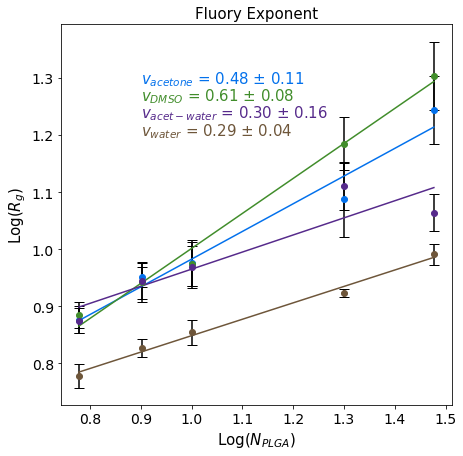

In [97]:
plt.figure(figsize=(7,7))
plt.errorbar(np.log10(n_plga), np.log10(rgace_npavgplga), yerr=rgace_stdplga, color='#0371EC', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(np.log10(n_plga), np.log10(rgdmso_npavgplga), yerr=rgdmso_stdplga, color='#418D2B', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(np.log10(n_plga), np.log10(rgawmix_npavgplga), yerr=rgawmix_stdplga, color='#562A8B', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(np.log10(n_plga), np.log10(rgwat_npavgplga), yerr=rgwat_stdplga, color='#6E563A', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')

plt.plot(np.log10(n_plga), gg_pace, color='#0371EC')
plt.plot(np.log10(n_plga), gg_pdmso, color='#418D2B')
plt.plot(np.log10(n_plga), gg_pawmix, color='#562A8B')
plt.plot(np.log10(n_plga), gg_pwat, color='#6E563A')

plt.title(r'Fluory Exponent', fontsize=15)
plt.xlabel(r'Log($N_{PLGA}$)', fontsize=15)
plt.ylabel(r'Log($R_{g}$)', fontsize=15)
plt.tick_params(labelsize=14)
plt.text(0.9, 1.29, r'$v_{acetone}$ = 0.48 ± 0.11', fontsize=15, color='#0371EC')
plt.text(0.9, 1.26, r'$v_{DMSO}$ = 0.61 ± 0.08', fontsize=15, color='#418D2B')
plt.text(0.9, 1.23, r'$v_{acet-water}$ = 0.30 ± 0.16', fontsize=15, color='#562A8B')
plt.text(0.9, 1.20, r'$v_{water}$ = 0.29 ± 0.04', fontsize=15, color='#6E563A')


### Rg vs time in different sol per monomer length

### N = 6

In [106]:
rgplga_awmixn6 = np.load('plga_awmix/n6plga_awmixRg.npy')
rgplga_acen6 = np.load('plga_ace/n6plga_aceRg.npy')
rgplga_dmson6 = np.load('plga_dmso/n6plga_dmsoRg.npy')
rgplga_watn6 = np.load('plga_wat/n6plga_watRg.npy')

In [107]:
trj_len = np.arange(18000)
trj_len

array([    0,     1,     2, ..., 17997, 17998, 17999])

(0.4, 2)

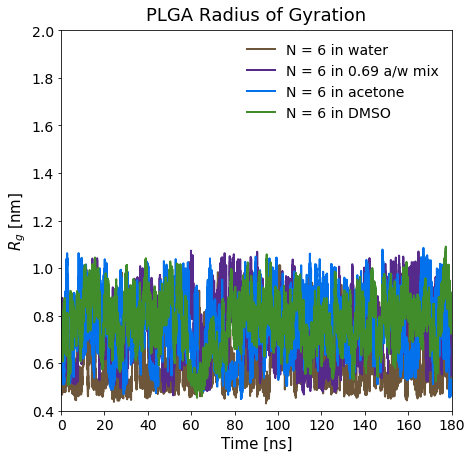

In [120]:
plt.figure(figsize=(7,7))
plt.title(r'PLGA Radius of Gyration', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{g}$ [nm]', fontsize=15)
plt.plot(trj_len/100, rgplga_watn6/10,linewidth=2, color='#6E563A')
plt.plot(trj_len/100, rgplga_awmixn6/10,linewidth=2, color='#562A8B')
plt.plot(trj_len/100, rgplga_acen6/10,linewidth=2, color='#0371EC')
plt.plot(trj_len/100, rgplga_dmson6/10,linewidth=2, color='#418D2B')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in water','N = 6 in 0.69 a/w mix','N = 6 in acetone','N = 6 in DMSO'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0.4,2)

## N = 8

In [109]:
rgplga_awmixn8 = np.load('plga_awmix/n8plga_awmixRg.npy')
rgplga_acen8 = np.load('plga_ace/n8plga_aceRg.npy')
rgplga_dmson8 = np.load('plga_dmso/n8plga_dmsoRg.npy')
rgplga_watn8 = np.load('plga_wat/n8plga_watRg.npy')

(0.5, 2)

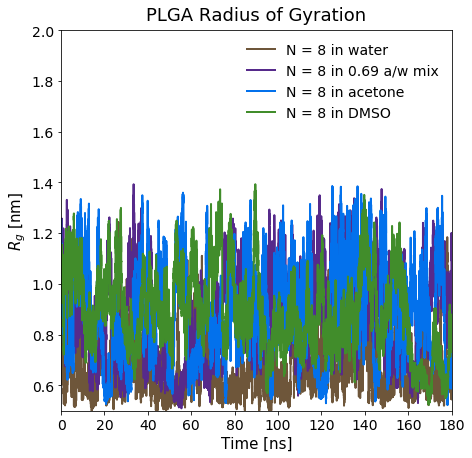

In [118]:
plt.figure(figsize=(7,7))
plt.title(r'PLGA Radius of Gyration', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{g}$ [nm]', fontsize=15)
plt.plot(trj_len/100, rgplga_watn8/10,linewidth=2, color='#6E563A')
plt.plot(trj_len/100, rgplga_awmixn8/10,linewidth=2, color='#562A8B')
plt.plot(trj_len/100, rgplga_acen8/10,linewidth=2, color='#0371EC')
plt.plot(trj_len/100, rgplga_dmson8/10,linewidth=2, color='#418D2B')
plt.tick_params(labelsize=14)
plt.legend(['N = 8 in water','N = 8 in 0.69 a/w mix','N = 8 in acetone','N = 8 in DMSO'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0.5,2)

## N = 10

In [113]:
rgplga_awmixn10 = np.load('plga_awmix/n10plga_awmixRg.npy')
rgplga_acen10 = np.load('plga_ace/n10plga_aceRg.npy')
rgplga_dmson10 = np.load('plga_dmso/n10plga_dmsoRg.npy')
rgplga_watn10 = np.load('plga_wat/n10plga_watRg.npy')

(0.5, 2.5)

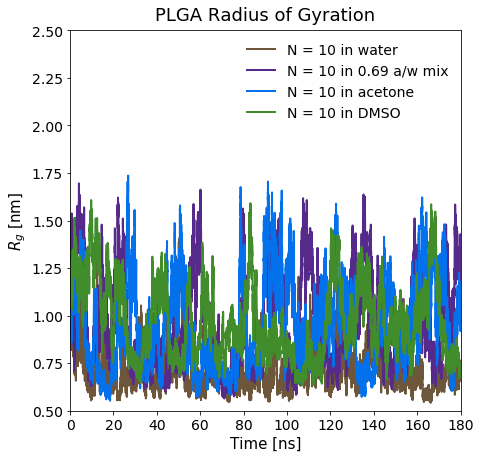

In [117]:
plt.figure(figsize=(7,7))
plt.title(r'PLGA Radius of Gyration', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{g}$ [nm]', fontsize=15)
plt.plot(trj_len/100, rgplga_watn10/10,linewidth=2, color='#6E563A')
plt.plot(trj_len/100, rgplga_awmixn10/10,linewidth=2, color='#562A8B')
plt.plot(trj_len/100, rgplga_acen10/10,linewidth=2, color='#0371EC')
plt.plot(trj_len/100, rgplga_dmson10/10,linewidth=2, color='#418D2B')
plt.tick_params(labelsize=14)
plt.legend(['N = 10 in water','N = 10 in 0.69 a/w mix','N = 10 in acetone','N = 10 in DMSO'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0.5,2.5)

## N = 20 

In [122]:
rgplga_awmixn20 = np.load('plga_awmix/n20plga_awmixRg.npy')
rgplga_acen20 = np.load('plga_ace/n20plga_aceRg.npy')
rgplga_dmson20 = np.load('plga_dmso/n20plga_dmsoRg.npy')
rgplga_watn20 = np.load('plga_wat/n20plga_watRg.npy')

(0.5, 3.5)

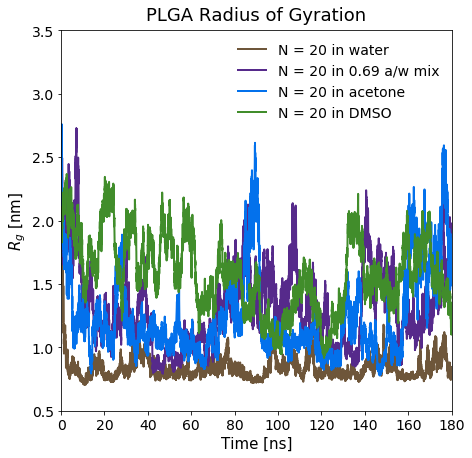

In [124]:
plt.figure(figsize=(7,7))
plt.title(r'PLGA Radius of Gyration', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{g}$ [nm]', fontsize=15)
plt.plot(trj_len/100, rgplga_watn20/10,linewidth=2, color='#6E563A')
plt.plot(trj_len/100, rgplga_awmixn20/10,linewidth=2, color='#562A8B')
plt.plot(trj_len/100, rgplga_acen20/10,linewidth=2, color='#0371EC')
plt.plot(trj_len/100, rgplga_dmson20/10,linewidth=2, color='#418D2B')
plt.tick_params(labelsize=14)
plt.legend(['N = 20 in water','N = 20 in 0.69 a/w mix','N = 20 in acetone','N = 20 in DMSO'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0.5,3.5)

## N = 30

In [125]:
rgplga_awmixn30 = np.load('plga_awmix/n30plga_awmixRg.npy')
rgplga_acen30 = np.load('plga_ace/n30plga_aceRg.npy')
rgplga_dmson30 = np.load('plga_dmso/n30plga_dmsoRg.npy')
rgplga_watn30 = np.load('plga_wat/n30plga_watRg.npy')

(0.5, 4)

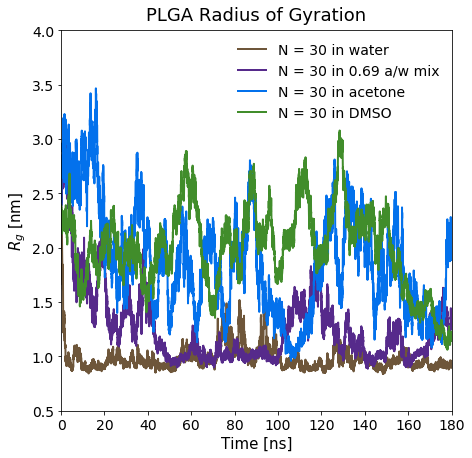

In [126]:
plt.figure(figsize=(7,7))
plt.title(r'PLGA Radius of Gyration', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{g}$ [nm]', fontsize=15)
plt.plot(trj_len/100, rgplga_watn30/10,linewidth=2, color='#6E563A')
plt.plot(trj_len/100, rgplga_awmixn30/10,linewidth=2, color='#562A8B')
plt.plot(trj_len/100, rgplga_acen30/10,linewidth=2, color='#0371EC')
plt.plot(trj_len/100, rgplga_dmson30/10,linewidth=2, color='#418D2B')
plt.tick_params(labelsize=14)
plt.legend(['N = 30 in water','N = 30 in 0.69 a/w mix','N = 30 in acetone','N = 30 in DMSO'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0.5,4)